# DIABETES 

1. [Import Dataset](#1)
    1. [Logistic Regression](#2)
        1. [Cross Validation](#3)
        1. [Data Visualization](#4)
        1. [Predict](#5)
    1. [SVM (Support Vector Machine)](#6)
        1. [Cross Validation](#7)
        1. [Predict](#8)
        1. [Data Visualization](#9)

<a id = "1"></a><b>
### Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id = "2"></a><b>
## 1. Logistic Regression

<a id = "3"></a><b>
### Cross Validation

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
scaller = StandardScaler()

In [6]:
df_log = df.copy()
x = df_log.drop(["Outcome"], axis = 1)
y = df_log["Outcome"]

In [7]:
x = scaller.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 66)

<a id = "3"></a><b>
### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
log_reg = LogisticRegression(random_state = 0)
log_reg = log_reg.fit(x_train, y_train)
log_predict = log_reg.predict(x_test)
log_accuracy = accuracy_score(log_predict, y_test)

In [11]:
log_accuracy

0.7755905511811023

<a id = "4"></a><b>
### Data Visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- 1 -> Number of people diabetes.
- 0 -> Number of people without diabetes.

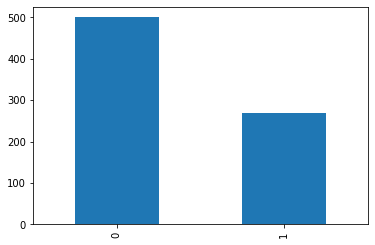

In [14]:
df.Outcome.value_counts().plot(kind='bar')
plt.show()

In [15]:
predict_new = {"predict": log_predict}
predict = pd.DataFrame(predict_new)

x_test = pd.DataFrame(x_test, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
x_test.reset_index(drop=True, inplace=True)

x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.547919,-0.966911,0.046245,-0.221835,-0.692891,-0.595578,-1.168412,-0.956462
1,-0.844885,-0.747831,-0.057150,0.029077,-0.692891,-0.608270,1.881908,-0.956462
2,-0.547919,-0.653939,0.046245,1.973647,-0.197966,1.079756,0.619498,-0.701198
3,-0.844885,-0.372265,-0.574128,-0.159107,0.314325,-0.443275,-0.763716,-0.956462
4,-1.141852,-0.591345,0.304734,0.154533,-0.692891,-4.060474,0.302385,-1.041549


In [16]:
new_data = pd.concat([x_test["BMI"], predict], axis = 1)
new_data.head()

,BMI,predict
0,-0.595578,0
1,-0.608270,0
2,1.079756,0
3,-0.443275,0
4,-4.060474,0


In [17]:
new_x = new_data["BMI"]
new_y = new_data["predict"]

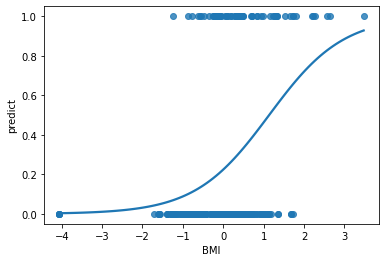

In [18]:
sns.regplot(x = new_x, y = new_y, data = new_data, logistic = True, ci=None)
plt.show()

<a id = "5"></a><b>
### Predict

In [19]:
input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 = (1,85,66,29,0,26.6,0.351,31)

In [20]:
#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaller.transform(input_data_reshape)

# Prediction
prediction = log_reg.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic


In [21]:
#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data2)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaller.transform(input_data_reshape)

# Prediction
prediction = log_reg.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Not Diabetic


<a id = "6"></a><b>
## 2. SVM (Support Vector Machine)

<a id = "7"></a><b>
### Cross Validation

In [22]:
from sklearn.svm import SVC

In [23]:
scaller = StandardScaler()
x = scaller.fit_transform(x)

In [24]:
reg_svc = SVC(random_state = 0, kernel = "rbf")
reg_svc.fit(x_train, y_train)

svm_predict = reg_svc.predict(x_test)
svm_accuracy = accuracy_score(svm_predict, y_test)

In [25]:
svm_accuracy

0.7677165354330708

<a id = "8"></a><b>
### Data Visualization

In [26]:
x1 = df["Pregnancies"]
x2 = df["Glucose"]

x_svc = pd.concat([x1, x2], axis = 1)
y = df["Outcome"]

In [27]:
scaller = StandardScaler()
x_svc = scaller.fit_transform(x_svc)

In [28]:
x_svc_train, x_svc_test, y_svc_train, y_svc_test = train_test_split(x_svc, y, test_size = 0.33, random_state = 66)

In [29]:
reg_svc_new = SVC(random_state = 0, kernel = "rbf")
reg_svc_new.fit(x_svc_train, y_svc_train)

svc_predict = reg_svc_new.predict(x_svc_test)
svc_accuracy = accuracy_score(svm_predict, y_svc_test)

In [30]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

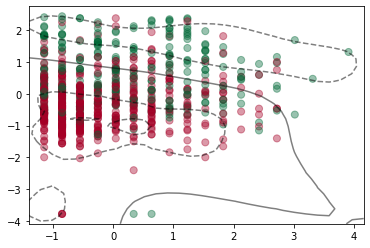

In [31]:
plt.scatter(x_svc[:, 0], x_svc[:, 1], c=y, s=50, cmap='RdYlGn', alpha=0.4)
plot_svc_decision_function(reg_svc_new);